In [81]:
pip install requests

# 1.Definição das Bibliotecas

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

#2. Carregamento e inspeção dos Dados

In [83]:
df = pd.read_csv('online_retail.csv')

In [84]:
# Visualização das 5 primeiras linhas do dadaset
df.head(5000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
4995,536836,21843,RED RETROSPOT CAKE STAND,2,2010-12-02 18:08:00,10.95,18168.0,United Kingdom
4996,536836,21531,RED RETROSPOT SUGAR JAM BOWL,2,2010-12-02 18:08:00,2.55,18168.0,United Kingdom
4997,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 18:08:00,4.95,18168.0,United Kingdom
4998,536836,22198,LARGE POPCORN HOLDER,2,2010-12-02 18:08:00,1.65,18168.0,United Kingdom


In [85]:
# Vamos verificar os tipos de dados
# Contagem de valores não nulos por coluna e
# Identificar missing values e tipos incorretos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [86]:
# Verificar o número de linhas e colunas.
df.shape

(541909, 8)

In [87]:
# Obter estatísticas descritivas básicas para colunas numéicas.
# (Média, contagem, desvio padrão, mínimo, quartis, máximo)
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [88]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [89]:
df.isnull().sum()

# Description: Possui 540.455 valores não nulos de 541.909. Isso significa 1.454 valores ausentes. É um número pequeno (~0.27%), mas precisamos decidir o que fazer.

# CustomerID: Possui apenas 406.829 valores não nulos de 541.909. Isso indica 135.080 valores ausentes, o que é muito significativo (aproximadamente 25% dos dados!).

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [90]:
# Esta parte do código preenche os valores ausentes (NaN) na coluna *Description*
df['Description'] = df['Description'].fillna('Sem Descrição')

In [91]:
# Tratando a coluna CustomerID
df['TransactionID'] = df.groupby(['InvoiceNo', 'InvoiceDate', 'Description']).ngroup()

# Preencher os CustomerID ausentes com o novo identificador
df['CustomerID'] = df['CustomerID'].fillna(df['TransactionID'])

# Convertendo os dados da coluna 'InvoiceDate' para datetime

In [92]:
# Primeiro vamos verificar o tipo de dado da coluna
print(df['InvoiceDate'].head())
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
Name: InvoiceDate, dtype: object


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    541909 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     541909 non-null  float64       
 7   Country        541909 non-null  object        
 8   TransactionID  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


# Agora que tratamos os dados, podemos focar em resolver algumas perguntas sobre o negócio!

Sobre as Vendas:
1.	Qual é o valor total de vendas ao longo do período?
2.	Quais são os produtos mais vendidos?
3.	Quais são os países que geram mais receita?
4.	Existe alguma sazonalidade nas vendas? (Ex: picos em datas comemorativas)
5.	Como as vendas se distribuem ao longo dos dias da semana ou meses do ano?
6.	Qual é o valor médio das compras por cliente?
7.	Existe uma correlação entre a quantidade de produtos comprados e o valor total da compra?
8.	Quais produtos são frequentemente comprados juntos?
Sobre os Clientes:
1.	Quantos clientes únicos existem no dataset?
2.	Qual é a frequência de compra dos clientes?
3.	Existe diferença no comportamento de compra entre clientes de diferentes países?
4.	Quais clientes são os mais valiosos em termos de receita gerada?
5.	É possível segmentar os clientes em grupos com base em seus padrões de compra?
6.	Qual a taxa de retenção de clientes?
Sobre os Produtos:
1.	Quantos produtos diferentes são vendidos?
2.	Qual é a distribuição de preços dos produtos?
3.	Existem produtos que são frequentemente devolvidos?
4.	Quais produtos geram mais lucro?
5.	Existe alguma relação entre a descrição do produto e sua popularidade?


# Questão 1.

In [94]:
df['ValorTotal'] = df['Quantity'] * df['UnitPrice']
valor_total_vendas = df['ValorTotal'].sum()
print(f"O valor total de vendas em todo o período é ~: {valor_total_vendas:.0f}")

O valor total de vendas em todo o período é ~: 9747748


# Questão 2.

In [95]:
# Agrupa os dados por descrição do produto e soma as quantidades vendidas
produtos_mais_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Mostra os 10 produtos mais vendidos em uma lista enumerada
for i, (produto, quantidade) in enumerate(produtos_mais_vendidos.head(20).items(), 1):
    print(f"{i}. {produto:50}            {quantidade:10}")

1. WORLD WAR 2 GLIDERS ASSTD DESIGNS                                  53847
2. JUMBO BAG RED RETROSPOT                                            47363
3. ASSORTED COLOUR BIRD ORNAMENT                                      36381
4. POPCORN HOLDER                                                     36334
5. PACK OF 72 RETROSPOT CAKE CASES                                    36039
6. WHITE HANGING HEART T-LIGHT HOLDER                                 35317
7. RABBIT NIGHT LIGHT                                                 30680
8. MINI PAINT SET VINTAGE                                             26437
9. PACK OF 12 LONDON TISSUES                                          26315
10. PACK OF 60 PINK PAISLEY CAKE CASES                                 24753
11. VICTORIAN GLASS HANGING T-LIGHT                                    23854
12. ASSORTED COLOURS SILK FAN                                          23082
13. BROCADE RING PURSE                                                 23053
14. RED 

# Questão 3.

In [96]:
# Agrupa por país e calcula a receita total
receita_por_pais = df.groupby('Country')['ValorTotal'].sum().sort_values(ascending=False)

# Mostra os países com maior receita em uma lista enumerada com valores alinhados
for i, (pais, receita) in enumerate(receita_por_pais.head(20).items(), 1):
    print(f"{i}. {pais:20} {receita:15.0f}")

1. United Kingdom               8187806
2. Netherlands                   284662
3. EIRE                          263277
4. Germany                       221698
5. France                        197404
6. Australia                     137077
7. Switzerland                    56385
8. Spain                          54775
9. Belgium                        40911
10. Sweden                         36596
11. Japan                          35341
12. Norway                         35163
13. Portugal                       29367
14. Finland                        22327
15. Channel Islands                20086
16. Denmark                        18768
17. Italy                          16891
18. Cyprus                         12946
19. Austria                        10154
20. Hong Kong                      10117


# Questão 4.

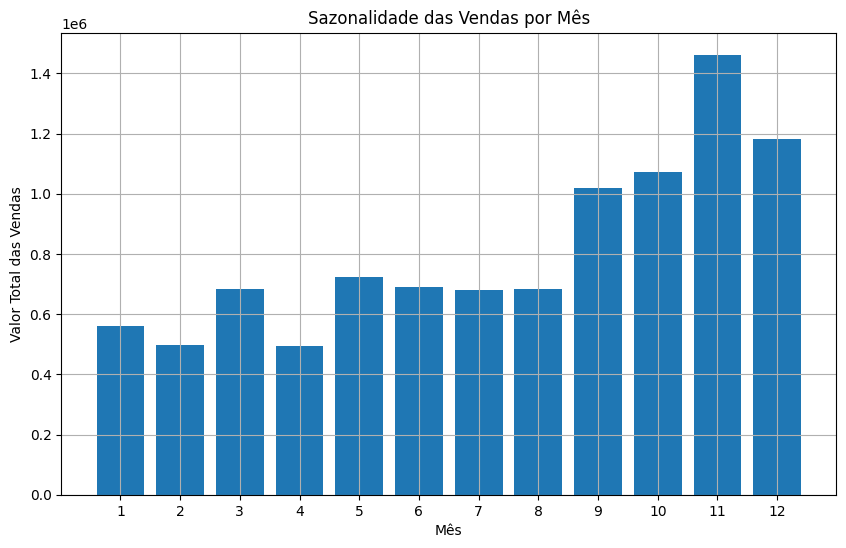

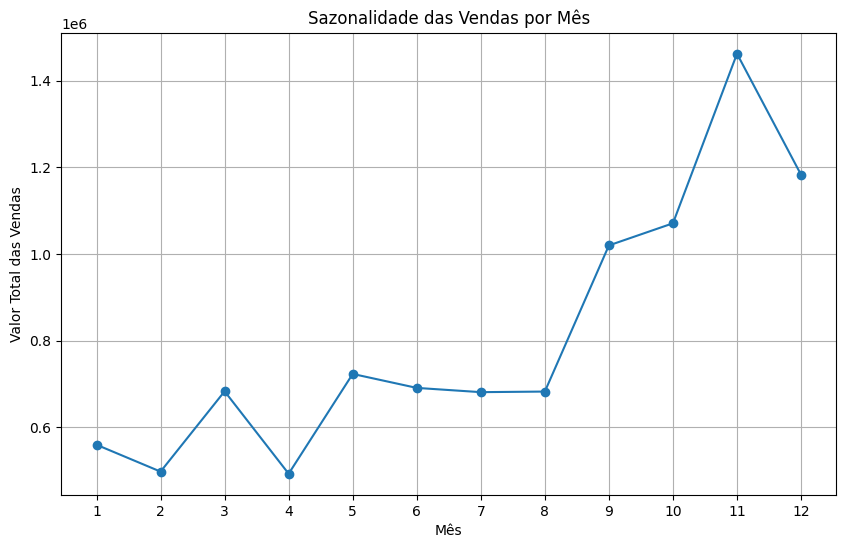

In [99]:
# Extrai o mês da data da fatura
df['Month'] = df['InvoiceDate'].dt.month

# Agrupa as vendas por mês e soma o valor total
vendas_por_mes = df.groupby('Month')['ValorTotal'].sum()

# Plota um gráfico de barras para visualizar as vendas por mês
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(vendas_por_mes.index, vendas_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Valor Total das Vendas')
plt.title('Sazonalidade das Vendas por Mês')
plt.xticks(vendas_por_mes.index)  # Define os rótulos do eixo x como os meses
plt.grid(True)  # Adiciona linhas de grade
plt.show()

# Extrai o dia da semana da data da fatura (0 = segunda-feira, 6 = domingo)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Agrupa as vendas por dia da semana e soma o valor total
vendas_por_dia_da_semana = df.groupby('DayOfWeek')['ValorTotal'].sum()

plt.figure(figsize=(10, 6))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o')  # marker='o' adiciona pontos para melhor visualização
plt.xlabel('Mês')
plt.ylabel('Valor Total das Vendas')
plt.title('Sazonalidade das Vendas por Mês')
plt.xticks(vendas_por_mes.index)
plt.grid(True)
plt.show()